# Introduction

In [129]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import count,avg,sum
from pyspark.sql.functions import col, desc,to_date
from pyspark import SparkFiles
import matplotlib.pyplot as plt



# Loading the data into Spark

To load the data I am using Spark DataFrames. That means that I am using Spark locally with all the cores (that’s the *), with version 3.1.2 and the name of the session is “Big Data Product: Violent Crime in Lockdown Britain”.

In [2]:
spark = SparkSession \
    .builder \
    .appName('Big Data Product: Violent Crime in Lockdown Britain') \
    .getOrCreate()

spark

In [ ]:
spark_context=spark.sparkContext

url = "https://unnkf7032.blob.core.windows.net/kf7032assign-data/all_crimes21_hdr.txt.gz"
spark.sparkContext.addFile(url)

df = spark.read.csv(SparkFiles.get("all_crimes21_hdr.txt.gz"), header=True, inferSchema= True)




In [69]:
df.show()
print ("Total Number of data in the dataset")
df.count()


+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|Last outcome category|Context|
+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|  -0.8056|51.819143|On or near Norfol...|E01017662| Aylesbury Vale 015C|         Other crime|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.494366|51.418169|On or near Keynsh...|E01014399|Bath and North Ea...|Anti-social behav...|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.511927|51.409435|

65078250

In [9]:
#interacting with Pandas easily and to showing my data in a prettier format
df.describe().toPandas()



,summary,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,count,40835915,65078250,65078250,65078250,64120803,64120803,65078250,62549985,62549985,65078250,38660118,122405
1,mean,None,None,None,None,-1.3903896490606482,52.45883748394405,None,None,None,None,None,None
2,stddev,None,None,None,None,1.4651967296510535,1.182096194538446,None,None,None,None,None,None
3,min,000000ca0e5b3c5d4b92efd4b0979d5121d0d71de7c46c...,2010-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-8.148313,-0.359286,No Location,E01000001,Adur 001A,Anti-social behaviour,Action to be taken by another organisation,"""<a href=""""http://www.cheshire.police.uk/advic..."
4,max,ffffffc637f3aea5842dcf9c191ec14cd9713ed5a76a8d...,2021-05,Wiltshire Police,Wiltshire Police,51.197395,58.5897,On or near Zurich Gardens,W01001958,York 024F,Violent crime,Under investigation,Vehicle Related Nuisance/Inappropriate Vehicle...


# Crime Category

The category the police use in the dataset is the crime type

In [72]:
dataset = df.select("Crime ID","Crime Type", "Month")
dataset.show()
print ("Crime Category: ")
dataset.count()

+--------+--------------------+-------+
|Crime ID|          Crime Type|  Month|
+--------+--------------------+-------+
|    null|         Other crime|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|            Burglary|2010-12|
|    null|            Burglary|2010-12|
|    null|         Other crime|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|Anti-social behav...|2010-12|
|    null|            Burglary|2010-12|
|    null|            Burglary|2010-12|
|    null|            Burglary|2010-12|
|    null|            Burglary|2010-12|
|    null|       Vehicle crime|2010-12|
+--------+--------------------+-------+
only showing top 20 rows

Crime Category

65078250

In [92]:
crime_category = (df.select('*')
        #.where(data_frame.AlcoholLevel>35)
        .groupBy('Crime Type', 'Month')
        .agg(count("Crime Type").alias('Total Crime'))
        .orderBy('Month')
               )

crime_category.toPandas()

,Crime Type,Month,Total Crime
0,Violent crime,2010-12,57580
1,Robbery,2010-12,5731
2,Anti-social behaviour,2010-12,201016
3,Other crime,2010-12,142705
4,Burglary,2010-12,37893
...,...,...,...
1627,Drugs,2021-05,15383
1628,Anti-social behaviour,2021-05,118045
1629,Other theft,2021-05,28979
1630,Violence and sexual offences,2021-05,171614


In [95]:
crime_category = (df.select('*')
        #.where(data_frame.AlcoholLevel>35)
        .groupBy('Crime Type')
        .agg(count("Crime Type").alias('Total Crime'))
        .orderBy('Crime Type')
               )

crime_category.show()

crime_category.agg({"Total Crime": "Sum"}).show()

+--------------------+-----------+
|          Crime Type|Total Crime|
+--------------------+-----------+
|Anti-social behav...|   20211528|
|       Bicycle theft|     735689|
|            Burglary|    4350252|
|Criminal damage a...|    5343182|
|               Drugs|    1682486|
|         Other crime|    2565111|
|         Other theft|    5206259|
|Possession of wea...|     283189|
|Public disorder a...|     242145|
|        Public order|    2564695|
|             Robbery|     696008|
|         Shoplifting|    3227557|
|Theft from the pe...|     714621|
|       Vehicle crime|    4170769|
|Violence and sexu...|   11411540|
|       Violent crime|    1673219|
+--------------------+-----------+

+----------------+
|sum(Total Crime)|
+----------------+
|        65078250|
+----------------+



In [97]:
crime_category.toPandas()

,Crime Type,Total Crime
0,Anti-social behaviour,20211528
1,Bicycle theft,735689
2,Burglary,4350252
3,Criminal damage and arson,5343182
4,Drugs,1682486
5,Other crime,2565111
6,Other theft,5206259
7,Possession of weapons,283189
8,Public disorder and weapons,242145
9,Public order,2564695


# Consistency of Crime Category

In [101]:
crime_category = (df.select('*')
        #.where(data_frame.AlcoholLevel>35)
        .groupBy('Crime Type', 'Month')
        .agg(count("Crime Type").alias('Total Crime'))
        .orderBy('Month')
               )

crime_category.show(1000)

+--------------------+-------+-----------+
|          Crime Type|  Month|Total Crime|
+--------------------+-------+-----------+
|            Burglary|2010-12|      37893|
|             Robbery|2010-12|       5731|
|         Other crime|2010-12|     142705|
|       Vehicle crime|2010-12|      29416|
|Anti-social behav...|2010-12|     201016|
|       Violent crime|2010-12|      57580|
|         Other crime|2011-01|     167072|
|Anti-social behav...|2011-01|     201792|
|            Burglary|2011-01|      44388|
|       Vehicle crime|2011-01|      34899|
|       Violent crime|2011-01|      59823|
|             Robbery|2011-01|       6667|
|       Violent crime|2011-02|      56691|
|         Other crime|2011-02|     168945|
|Anti-social behav...|2011-02|     206801|
|             Robbery|2011-02|       6480|
|       Vehicle crime|2011-02|      33591|
|            Burglary|2011-02|      41821|
|       Violent crime|2011-03|      62326|
|             Robbery|2011-03|       6558|
|         O

In [102]:
crime_category.toPandas()

,Crime Type,Month,Total Crime
0,Violent crime,2010-12,57580
1,Robbery,2010-12,5731
2,Anti-social behaviour,2010-12,201016
3,Other crime,2010-12,142705
4,Burglary,2010-12,37893
...,...,...,...
1627,Drugs,2021-05,15383
1628,Anti-social behaviour,2021-05,118045
1629,Other theft,2021-05,28979
1630,Violence and sexual offences,2021-05,171614


# Levels of Violent Crime

The level of violent crime 

In [103]:
violent_crime= (df.select('*')
        .where(df['Crime type']=='Violent crime')
        .groupBy('Crime Type', 'Month')
        .agg(count("Crime Type").alias('Total Crime'))
        .orderBy('Month')
               )

violent_crime.show()

+-------------+-------+-----------+
|   Crime Type|  Month|Total Crime|
+-------------+-------+-----------+
|Violent crime|2010-12|      57580|
|Violent crime|2011-01|      59823|
|Violent crime|2011-02|      56691|
|Violent crime|2011-03|      62326|
|Violent crime|2011-04|      64299|
|Violent crime|2011-05|      63633|
|Violent crime|2011-06|      62475|
|Violent crime|2011-07|      66572|
|Violent crime|2011-08|      63284|
|Violent crime|2011-09|      57150|
|Violent crime|2011-10|      60076|
|Violent crime|2011-11|      56895|
|Violent crime|2011-12|      56163|
|Violent crime|2012-01|      56324|
|Violent crime|2012-02|      50598|
|Violent crime|2012-03|      58606|
|Violent crime|2012-04|      53415|
|Violent crime|2012-05|      59541|
|Violent crime|2012-06|      56816|
|Violent crime|2012-07|      60199|
+-------------+-------+-----------+
only showing top 20 rows



In [140]:
violent_crime=violent_crime.toPandas()
violent_crime

,Crime Type,Month,Total Crime
0,Violent crime,2010-12,57580
1,Violent crime,2011-01,59823
2,Violent crime,2011-02,56691
3,Violent crime,2011-03,62326
4,Violent crime,2011-04,64299
5,Violent crime,2011-05,63633
6,Violent crime,2011-06,62475
7,Violent crime,2011-07,66572
8,Violent crime,2011-08,63284
9,Violent crime,2011-09,57150


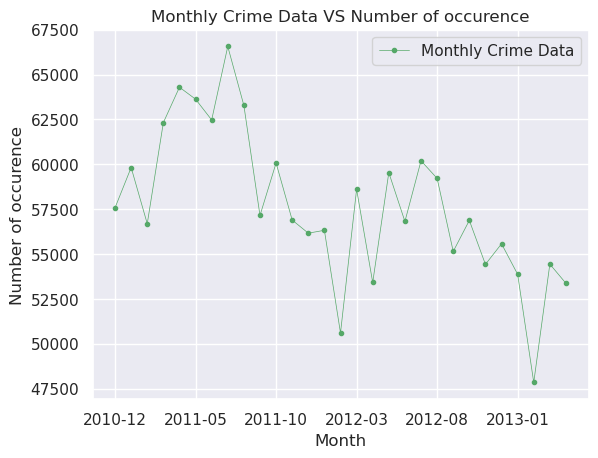

In [194]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt




plt.figsize=(30, 6)
violent_crime.plot(y='Total Crime', x='Month',marker='.',color='g', linestyle='-', linewidth=0.5,\
         subplots=False,
         label='Monthly Crime Data',
         title='Monthly Crime Data VS Number of occurence')
plt.ylabel('Number of occurence')

plt.show()

# dfg = violent_crime.select(to_date(col("Month"),"yyyy-MM").alias("month"),'Total Crime')\
# .where((df['Crime type'] == 'Violent crime'))

# pdf=dfg.toPandas()

# pdf


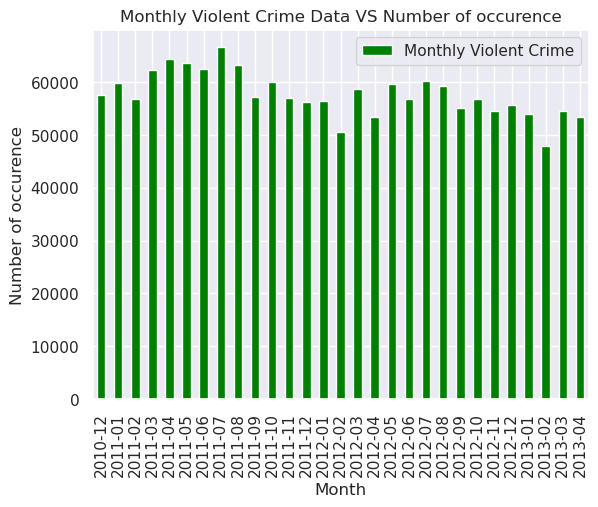

In [195]:
plt.figsize=(20, 6)
violent_crime.plot(y='Total Crime', x='Month', kind='bar',facecolor='green',\
         subplots=False,
         label='Monthly Violent Crime',
         title='Monthly Violent Crime Data VS Number of occurence')
plt.ylabel('Number of occurence')


plt.show()

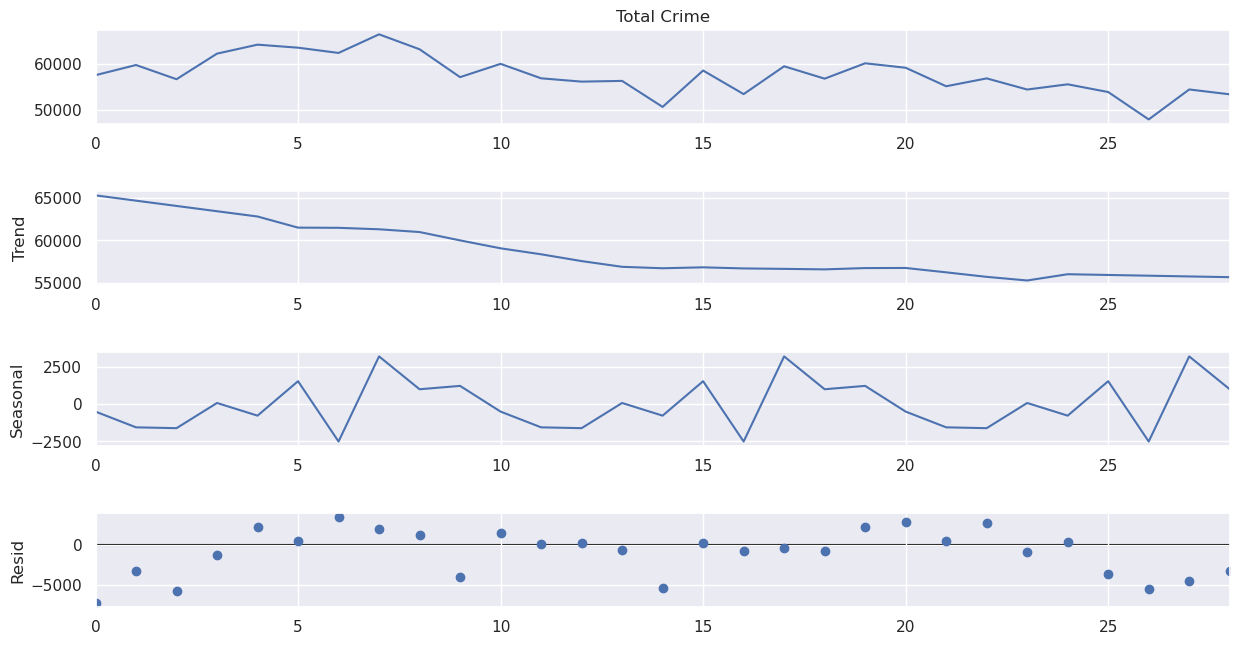

In [190]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(violent_crime['Total Crime'], model='additive',extrapolate_trend='freq',period=10)
fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.show()


In [66]:

import matplotlib.pyplot as plt

fig= plt.figure()
ax = fig.add_axes([0,0,1,1])
crime_type = 

# string = "Leicester"
# dataset = df.select("*").where(df['LSOA name'] LIKE '%lei%')
# dataset.show()
# dataset.count()
dataset= df.where('location like "%Midlands%" or location like "%Leicester%"')
# dataset= df.where(col('location').like("%Leicester%"))
dataset.show()
dataset.count()

# print(string[0:5])

+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|Last outcome category|Context|
+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.509286|51.474483|On or near Leices...|E01014976|South Gloucesters...|Anti-social behav...|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.509286|51.474483|On or near Leices...|E01014976|South Gloucesters...|Anti-social behav...|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.509286|51.474483|

25627

In [60]:

dataset = df.select("*").where(df['location'] == 'On or near Leicester')
dataset.show()
dataset.count()


+--------+-------+--------------------+--------------------+---------+--------+--------------------+---------+--------------+--------------------+---------------------+-------+
|Crime ID|  Month|         Reported by|        Falls within|Longitude|Latitude|            Location|LSOA code|     LSOA name|          Crime type|Last outcome category|Context|
+--------+-------+--------------------+--------------------+---------+--------+--------------------+---------+--------------+--------------------+---------------------+-------+
|    null|2010-12|British Transport...|British Transport...|  -1.1253| 52.6314|On or near Leicester|E01013646|Leicester 040A|Anti-social behav...|                 null|   null|
|    null|2010-12|British Transport...|British Transport...|  -1.1253| 52.6314|On or near Leicester|E01013646|Leicester 040A|Anti-social behav...|                 null|   null|
|    null|2010-12|British Transport...|British Transport...|  -1.1253| 52.6314|On or near Leicester|E01013646|Leice

836

In [68]:
dataset = df.select("*").where(df['month'] == '2010')
dataset.show()
dataset.count()


+--------+-----+-----------+------------+---------+--------+--------+---------+---------+----------+---------------------+-------+
|Crime ID|Month|Reported by|Falls within|Longitude|Latitude|Location|LSOA code|LSOA name|Crime type|Last outcome category|Context|
+--------+-----+-----------+------------+---------+--------+--------+---------+---------+----------+---------------------+-------+
+--------+-----+-----------+------------+---------+--------+--------+---------+---------+----------+---------------------+-------+



0

In [98]:
dataset = df.select("*").where(df['Crime type'] == 'Violent crime')
#dataset.show()
print ("Total Number of Violent Crime: ")
dataset.count()



Total Number of Violent Crime: 


1673219